# Applied Group Project


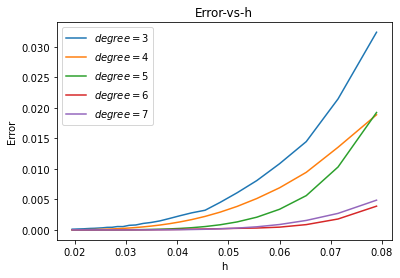

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from ipywidgets import interact,interactive #Used in Question 3
from ipywidgets import fixed
import scipy # Used in Question 4
from scipy.interpolate import CubicSpline

def PiecewisePoly(Ndeg, x0, y0, x_j):                      
    MM = Ndeg + 1                                          # degree + 1 = number of points to find
    N_interpolant = len(x0) - Ndeg                         # number of polynomials to get 
    pts = np.arange(Ndeg+1) + np.arange(N_interpolant).reshape(N_interpolant,1)  # small set of x points
    
    a = np.zeros((Ndeg+1,N_interpolant))
    pows = (MM-1-np.arange(MM)).reshape(MM,1)         
    
    for i in range(N_interpolant):
        A = np.vander(x0[pts[i,:]])
        a[:,i] = np.linalg.solve(A,y0[pts[i,:]])     #vander + solving for small set of x points
    
    y = np.empty_like(x_j) 
    pows = Ndeg-np.arange(MM)                        #putting powers in correct order
    
    for n in range(len(x_j)):
        if((x_j[n]<x0).all()):
            k=0
        elif((x_j[n]>x0).all()):
            k=len(x0)-1
        else:             # find k for x_i, accounting for the possibility that x_i=x_k
            k = np.where(((x_j[n]<x0[1:]) & (x_j[n]>=x0[:-1])) | 
                         ((x0[1:]==x_j[n]) & (x_j[n]>x0[:-1])))[0][0]
     
        j = k - Ndeg//2    
        j = max(0,j)
        j = min(j,N_interpolant-1)
        
        y[n] = np.sum(a[:,j]*x_j[n]**pows)  # obtain new data point
        
    return y

# Testing our function with a given function and uneven data points. 
def f(x):
    return np.exp(x)*np.cos(10*x)


# Creating a funciton to return the maximum error 
def error_function(N, f, a, b, deg):
    
    x1 = np.linspace(a, b, N)
    y1 = f(x1)
 
    evalpts = np.linspace(a, b, 100)
    
    # deleting points in evalpts if they are equal to x1
    for i in range(len(x1)):
        if (evalpts[i] == x1[i]):
            np.delete(evalpts, i)

    Y = PiecewisePoly(deg, x1, y1, evalpts)
    
    max_error = max(abs(f(evalpts) - Y))
    
    return max_error

# Function to plot the error considering degree of the piecewise poly
def PlotError(deg):
    X = []
    Y = [] 
    for N in range(20, 80, 2):
    
        a = 0
        b = 1.5   
    
        h = (b-a)/(N-1)
    
        X.append(h)                                   # storing original step-size h
        Y.append(error_function(N, f, a, b, deg))     # storing errors corresponding defined to h
    
    plt.plot(X, Y,label=f'$degree={deg}$')
    plt.xlabel("h")
    plt.ylabel("Error")
    plt.title("Error-vs-h")

# Plotting degrees 3 to 7
for i in range(3, 8):
    PlotError(i)
    plt.legend()

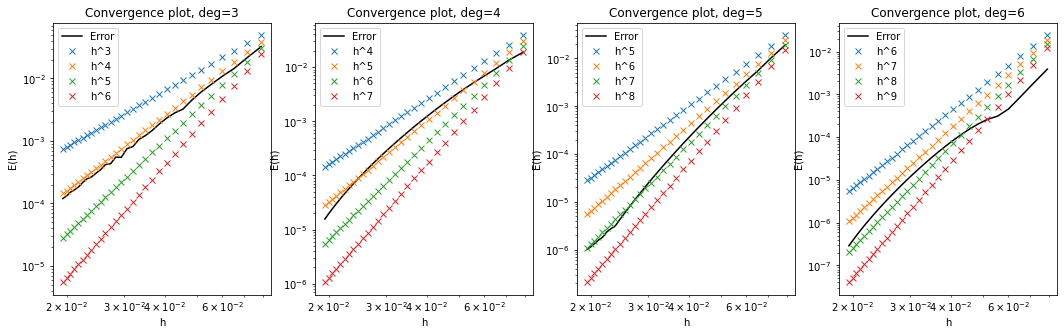

In [3]:
# Function to test rate of convergence of error data
def Conv(deg, n):
    
    X = [] 
    X_new = [] 
    Y = [] 
    
    for N in range(20, 80, 2):
        a = 0
        b = 1.5  
        h = (b-a)/(N-1)
    
        X.append(h)                     
        X_new.append(10**(n-1)*h**n)    # storing new step-size proportianate to h^n
       
        Y.append(error_function(N, f, a, b, deg))
        
    return X,Y,X_new

# Creating subplots to show the convergence rate for 4 degrees
fig, axs = plt.subplots(1,4, figsize=(18, 5))
for j in range(4):
    degree = j+3
    axs[j].loglog(Conv(degree,0)[0],Conv(degree,0)[1],'-',label="Error",color='k')
    
    for n in range(degree,degree+4):       # comparing h^n for 4 different n 
        
        axs[j].loglog(Conv(degree,n)[0],Conv(degree,n)[2],'x',label=f'h^{n}') 
        axs[j].set_xlabel("h")
        axs[j].set_ylabel("E(h)")
        axs[j].set_title("Convergence plot, " f'deg={degree}')
        axs[j].legend()